# Data Set Information:

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

The data set was generated by a Monte Carlo program, Corsika, described in:
D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
Forschungszentrum Karlsruhe FZKA 6019 (1998).
[Web Link]

The program was run with parameters allowing to observe events with energies down to below 50 GeV.

#Source:

Original Owner:

R. K. Bock
Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
http://wwwmagic.mppmu.mpg.de
rkb '@' mail.cern.ch

#Donor:

P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
#suppose there are no headers in the csv file so this is a way to add the headers or replace the one that are already there
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)


In [3]:
#what this is going to do is that it will see that if the class is equal to g than it is going to give it as 1 otherwise it is going to assign it as 0
df["class"] = (df["class"] == "g").astype(int)

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [ ]:
#this is going to prepare a dataframe for the datas whose class is equal to 0
df[df["class"]]==0

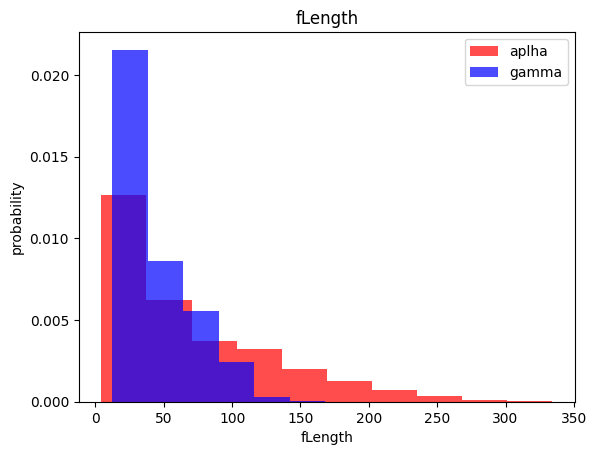

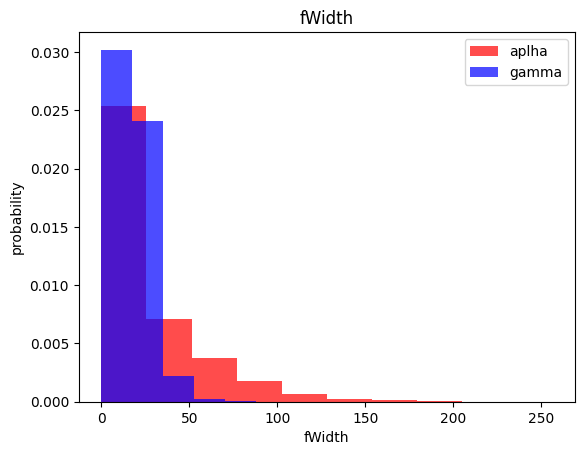

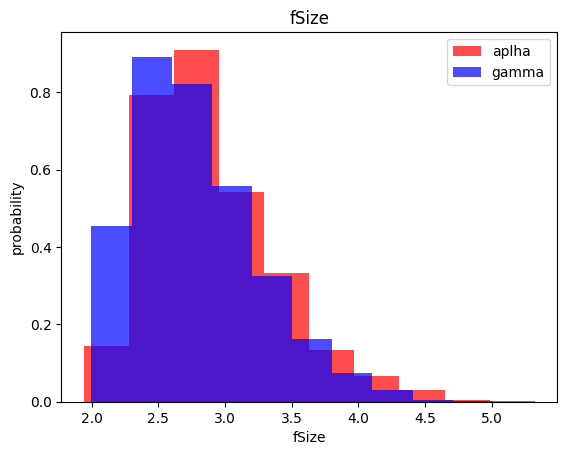

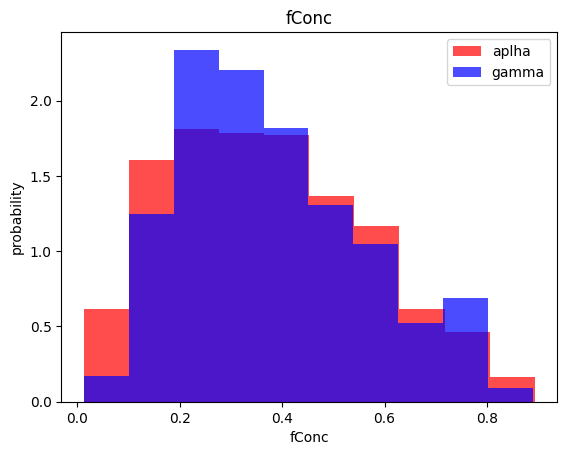

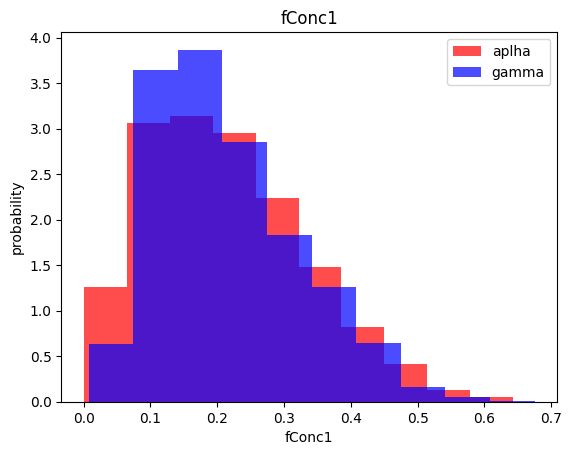

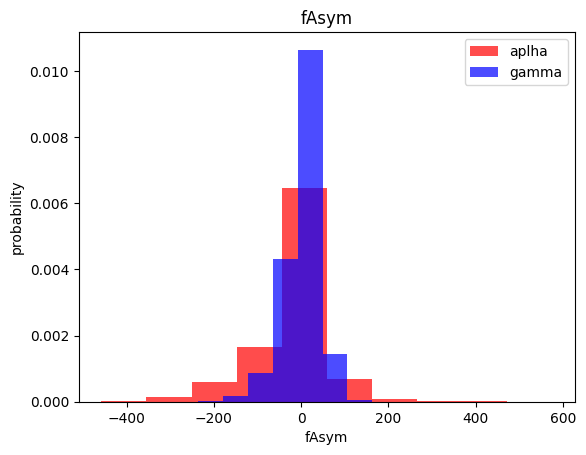

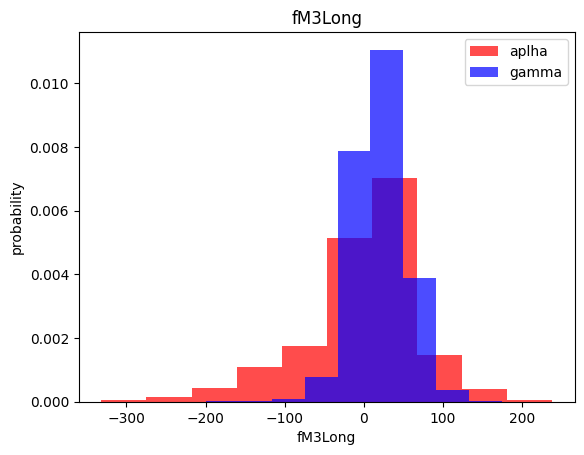

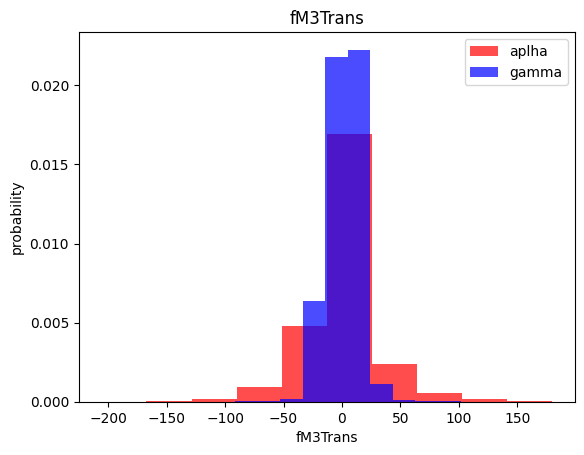

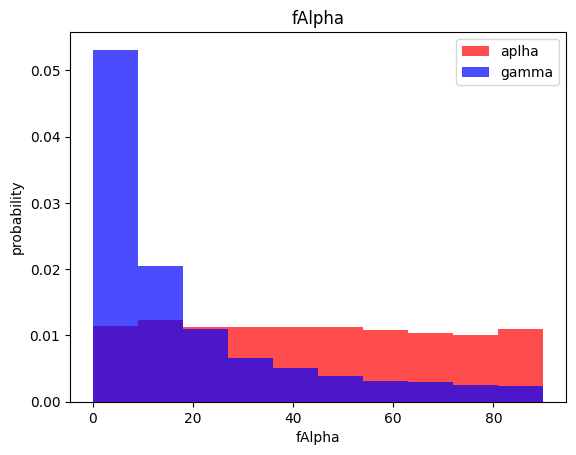

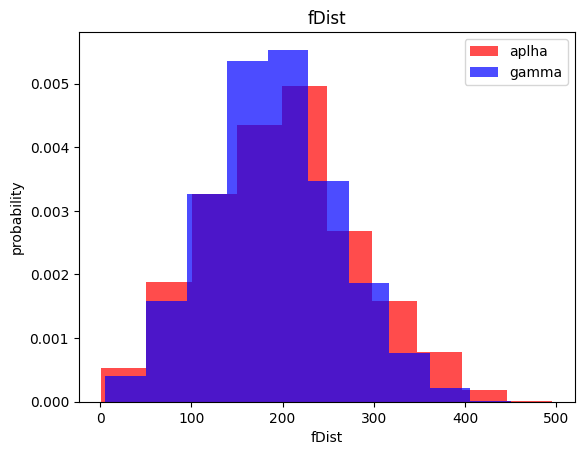

In [5]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 0][label], color="red", label="aplha", alpha=0.7, density = True)
    plt.hist(df[df["class"] == 1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

# TRAIN, VALIDATION AND TEST DATASETS

In [17]:
#split function split the database and by default the axis=0 which means that it is going to split on row
train, validation, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) #here the two arguments: in the 
#first we are giving the shuffled data and the next one we are telling how to divide it into three. 60% of data will go to train
#60-80% will go to the validation and the 80%-100% will go the test

In [7]:
test #here we can see that for some of the columns or features they have larger data as compared to other so we have to scale
#them so that they are relative to the mean and standard deviation of that particular coloumn

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12394,24.4481,10.0887,2.5841,0.6311,0.3495,3.0357,11.5541,-12.5196,73.0773,117.5153,0
8569,21.8435,15.4761,2.3775,0.4990,0.2537,11.6269,19.5635,10.1102,86.2351,100.7350,1
12375,177.6560,55.8744,3.3590,0.2035,0.1087,-89.3844,-156.0140,24.0003,2.3331,272.0850,0
9268,57.2663,15.5090,2.7292,0.2687,0.1483,68.9602,37.5807,-11.4585,4.8190,199.8070,1
5426,38.3392,18.2407,2.6928,0.3266,0.1957,44.3860,-24.9301,15.5016,7.1160,241.7470,1
...,...,...,...,...,...,...,...,...,...,...,...
4301,19.6502,9.5579,2.3502,0.5982,0.3192,24.3778,9.1392,4.8182,27.1728,230.5100,1
7106,72.3434,24.8566,2.8069,0.2761,0.1396,41.1614,77.3764,-9.0058,79.8860,87.5884,1
7770,23.8937,18.0731,2.6990,0.3300,0.1750,30.2204,17.3579,-8.4548,76.0065,158.3920,1
18967,43.2848,14.5711,2.5014,0.4801,0.2659,54.1012,32.1494,-6.6345,54.2701,250.4787,0


In [11]:
def scale_dataset(dataframe, oversampler=False):
    a = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values  

    scaler = StandardScaler()
    x = scaler.fit_transform(a)

    if oversampler:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y) #refer the below column to know why we are doing this part

    data = np.hstack((x, np.reshape(y, (-1,1)))) #what we are doing here is that our x is a 2d array where as the y is only a 1
    #dimension array so to convert it to a 2d we are using the np.reshape and there (-1,1), -1 is nothing but the lenght of the
    #array it is similar to writing the len(x)

    return data, x, y


In [9]:
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) 
#so by doing that we can find that there is a great difference between our both dataset so what we have to do is that we have
#to do is that we have to oversample our database so that they can come closer to each other

7403
4009


In [18]:
train, x_train, y_train = scale_dataset(train, oversampler=True )
validation, x_validation, y_validation = scale_dataset(validation, oversampler=False )
test, x_test, y_test = scale_dataset(test, oversampler=False )
#here we our keeping oversampler=False for our validation and test data because we don't want to sample them as we will not
#be aware about the data how it is and how it is not so in such conditions our model should perform well

#so with this our data table is ready and now we will work on the models


In [14]:
len(train)
len(x_train)
len(y_train)
#if we check this we can easily see that our data has been equally divided

14806